In [141]:
# -*- coding: utf-8 -*-
# Anaëlle Pierredon et Jianying Liu

"""
Ce notebook permet de faire des visualisations de nos fichiers résultats et notamment :

- Cas selon le type de MWE
- Cas selon le corpus
- Validation selon Cas + catégorie

- Vrais selon le type de MWE
- Vrais selon le cas
- Quelque chose avec le degré

- Nombre d'expressions différentes (lemmes)
- VID les plus courantes
- LVC les plus courantes
- Répartitions de la validation de quelques expressions les plus courantes
"""

import re
import glob
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

plt.rcParams["figure.figsize"] = (16,10)

# Lecture des fichiers

In [104]:
# Lecture des fichiers json et création d'un pandas dataframe contenant les résultats de tous les corpus
# Chaque ligne du dataframe correspond à une expression trouvée
liste_fichiers = []
liste_corpus = []
liste_types = []
df_resultats = pd.DataFrame()

for fichier in glob.glob("*_validation.json"):
    if "long" not in fichier:
        corpus = re.sub("_[0-9]+_validation.json", "", fichier)
        liste_corpus.append(corpus)
        with open(fichier, 'r') as json_file:
            data = json.load(json_file)
            for type_mwe in data:
                liste_types.append(type_mwe)
                dftmp = pd.DataFrame(data[type_mwe]['MWES'])
                dftmp["TYPE"] = type_mwe
                dftmp["CORPUS"] = corpus
                df_resultats = pd.concat([df_resultats, dftmp], ignore_index = True)
liste_types = list(set(liste_types))
df_resultats.tail(3)

,FICHIER,PHRASE,TOKENS,COREF,CAS,CHAINE(S),VALIDATION,DEGRE DE COMPOSITIONNALITE,SOURCE D'ERREUR,TYPE,CORPUS
406,CO2_ESLO_003_C_mwe_coref.cupt,alors il y a eu un il y a eu un intermède où p...,"['gardé', 'souvenir']","['*', '227:1903']",{'1903': 4},"{'227': '{'1903': ['un', 'souvenir', 'euh', 't...",vrai,,[],LVC.full,ancor_ESLO_CO2
407,CO2_ESLO_003_C_mwe_coref.cupt,oui oui oui oui oui j' ai été au vingt-quatre ...,"['pris', 'photos']","['*', '255:2002']",{'2002': 4},"{'255': '{'1989': ['de', 'les', 'photos', 'de'...",vrai,,[],LVC.full,ancor_ESLO_CO2
408,CO2_ESLO_002_C_mwe_coref.cupt,sur la maquette oui voyez- vous ? parce que eu...,"['vous', 'mis']","['98:1138', '*']",{'1138': 3},"{'98': '{'1087': ['les', 'peintres'], '1092': ...",faux,,[MWE incorrecte],IRV,ancor_ESLO_CO2


In [115]:
# Vérifier les informations
print(f"CORPUS : {liste_corpus}")
print(f"TYPES : {liste_types}")

CORPUS : ['ancor_tele', 'ER_0-100', 'frwiki', 'emea', 'ancor_short', 'annodisER', 'ancor_ESLO_CO2']
TYPES : ['LVC.cause', 'MVC', 'VID', 'IRV', 'LVC.full']


In [96]:
# Nombre d'expressions, Nombre de corpus, Corpus le plus courant
df_resultats["CORPUS"].describe()

count          409
unique           7
top       ER_0-100
freq            96
Name: CORPUS, dtype: object

# Graphiques sur les résultats globaux

In [98]:
# Mini df cas - type - corpus - validation
# Chaque ligne correspond à un cas (parfois plusieurs cas pour une expression trouvée)
dico = {}
cnt = 0
for ind in df_resultats.index:
    for cas in eval(df_resultats['CAS'][ind]).values():
        dico[cnt] = {"CAS": cas,
                     "TYPE": df_resultats['TYPE'][ind],
                     "CORPUS": df_resultats['CORPUS'][ind],
                     "VALIDATION": df_resultats['VALIDATION'][ind]}
        cnt +=1
minidf = pd.DataFrame(dico).T
minidf.head(10)

,CAS,TYPE,CORPUS,VALIDATION
0,4,VID,ancor_tele,faux
1,3,VID,ancor_tele,faux
2,3,VID,ancor_tele,faux
3,3,VID,ancor_tele,faux
4,3,VID,ancor_tele,faux
5,3,VID,ancor_tele,faux
6,3,VID,ancor_tele,faux
7,3,VID,ancor_tele,faux
8,4,LVC.full,ancor_tele,vrai
9,4,LVC.cause,ER_0-100,faux


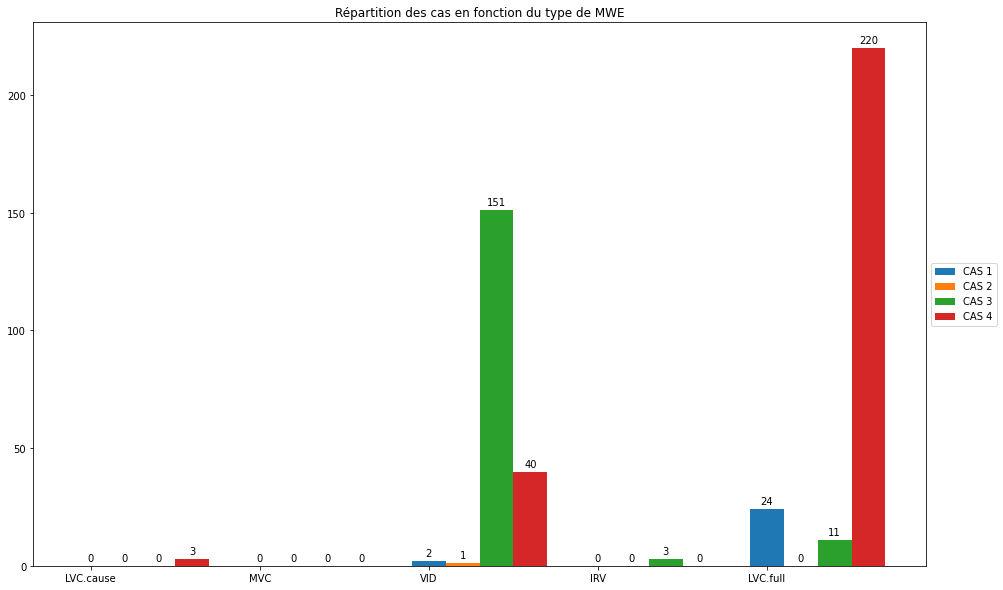

In [142]:
# Cas selon le type de MWE

# Ordre des types dans les arrays
indices = {}
for ind, type_mwe in enumerate(liste_types):
    indices[type_mwe] = ind

# Récupérer les infos pour le graphique
infos = {}
for ind in minidf.index:
    type_mwe = indices[minidf['TYPE'][ind]]
    cas = minidf['CAS'][ind]
    if cas in infos:
        infos[cas][type_mwe] += 1
    else:
        infos[cas] = np.zeros(len(liste_types))
        infos[cas][type_mwe] += 1

# Position des infos en abscisses
x = np.arange(len(liste_types))
barWidth = 0.20
r1 = x
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
position = [r1, r2, r3, r4]

# Création du graphique
fig, ax = plt.subplots()
cnt = 0
for cas, type_arr in sorted(infos.items(), key=lambda t: t[0]):
    elt = ax.bar(position[cnt], type_arr, width=barWidth, label=f'CAS {cas}')
    ax.bar_label(elt, padding=3)
    cnt += 1
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticks(x)
ax.set_xticklabels(liste_types)
ax.set_title("Répartition des cas en fonction du type de MWE")

plt.show()

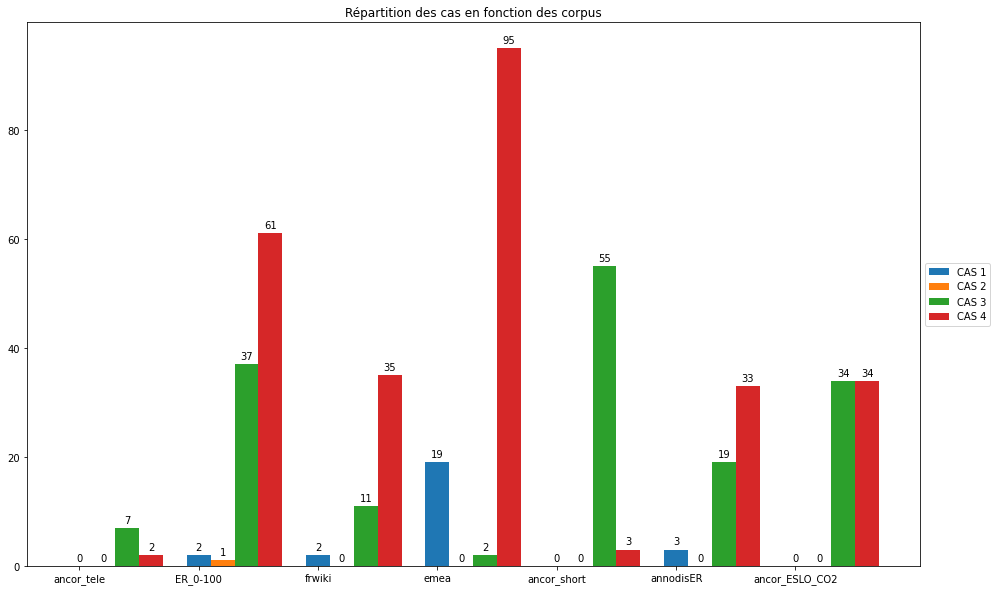

In [143]:
# Cas selon le corpus

# Ordre des corpus dans les arrays
indices = {}
for ind, corpus in enumerate(liste_corpus):
    indices[corpus] = ind

# Récupérer les infos pour le graphique
infos = {}
for ind in minidf.index:
    corpus = indices[minidf['CORPUS'][ind]]
    cas = minidf['CAS'][ind]
    if cas in infos:
        infos[cas][corpus] += 1
    else:
        infos[cas] = np.zeros(len(liste_corpus))
        infos[cas][corpus] += 1

# Position des infos en abscisses
x = np.arange(len(liste_corpus))
barWidth = 0.20
r1 = x
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
position = [r1, r2, r3, r4]

# Création du graphique
fig, ax = plt.subplots()
cnt = 0
for cas, corpus_arr in sorted(infos.items(), key=lambda t: t[0]):
    elt = ax.bar(position[cnt], corpus_arr, width=barWidth, label=f'CAS {cas}')
    ax.bar_label(elt, padding=3)
    cnt += 1
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticks(x)
ax.set_xticklabels(liste_corpus)
ax.set_title("Répartition des cas en fonction des corpus")

plt.show()

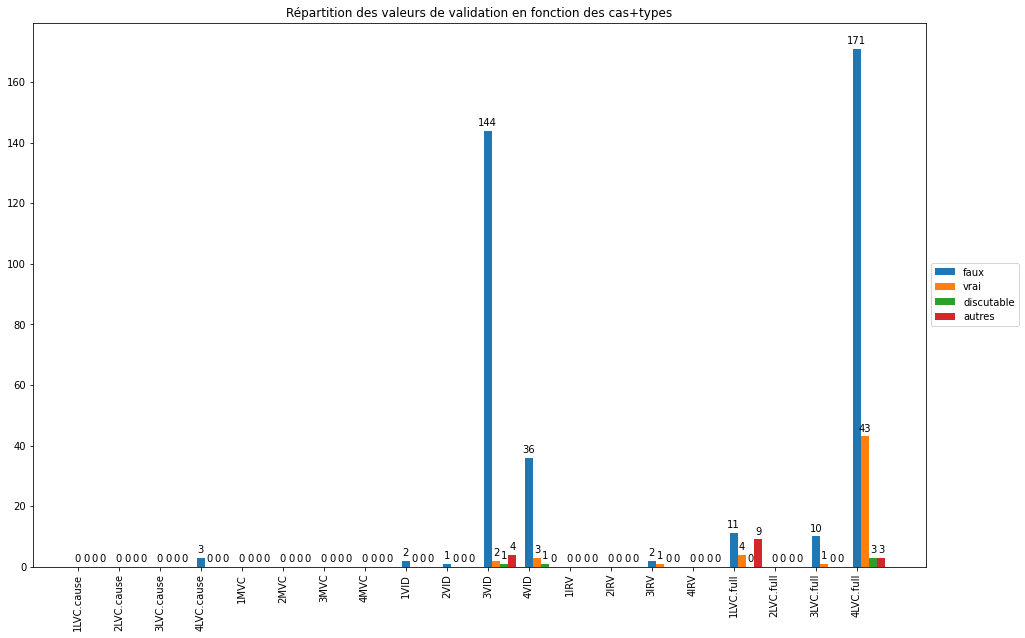

In [146]:
# Validation selon Cas + type

# Création de la liste des cas + type
liste_castypes = []
for type_mwe in liste_types:
    liste_castypes.extend([f"1{type_mwe}", f"2{type_mwe}", f"3{type_mwe}", f"4{type_mwe}"])

# Ordre des castypes dans les arrays
indices = {}
for ind, castype in enumerate(liste_castypes):
    indices[castype] = ind

# Récupérer les infos pour le graphique
infos = {}
for ind in minidf.index:
    val = minidf['VALIDATION'][ind]
    if val not in ["vrai", "faux", "discutable"]:
        val = "autres"
    castype = indices[f"{minidf['CAS'][ind]}{minidf['TYPE'][ind]}"]
    if val in infos:
        infos[val][castype] += 1
    else:
        infos[val] = np.zeros(len(liste_castypes))
        infos[val][castype] += 1

# Position des infos en abscisses
x = np.arange(len(liste_castypes))
barWidth = 0.20
r1 = x
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]
position = [r1, r2, r3, r4, r5, r6, r7, r8, r9]

# Création du graphique
fig, ax = plt.subplots()
cnt = 0
for val, castype_arr in infos.items():
    elt = ax.bar(position[cnt], castype_arr, width=barWidth, label=val)
    ax.bar_label(elt, padding=3)
    cnt += 1
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticks(x)
ax.set_xticklabels(liste_castypes)
ax.set_title("Répartition des valeurs de validation en fonction des cas+types")

plt.xticks(rotation=90)
plt.show()

# Graphiques sur les résultats corrects 

In [ ]:
# Vrais selon le type de MWE

In [ ]:
# Vrais selon le cas

In [ ]:
# Quelque chose avec le degré ?

# Graphiques sur les expressions polylexicales

In [ ]:
# Nombre d'expressions différentes (lemmes)

In [ ]:
# VID les plus courantes

In [ ]:
# LVC les plus courantes

In [ ]:
# Répartitions de la validation de quelques expressions les plus courantes